In [1]:
#loading libraries, first the most basic 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#importing the dataset 
df = pd.read_csv('PillowData.csv')

In [22]:
df.info() #just having a look 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
Start Time                    18 non-null object
 End Time                     18 non-null object
 Duration (mins)              18 non-null int64
 Nap                          18 non-null object
 Sleep Quality (%)            18 non-null int64
 Time Awake (mins)            18 non-null int64
 Time in REM Slep (mins)      18 non-null int64
Time in Light Sleep (mins)    18 non-null int64
 Time In Deep Sleep (mins)    18 non-null int64
 SoundsRecorded               18 non-null int64
 Wake-up mood                 18 non-null object
Headache                      18 non-null int64
Strength                      18 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.9+ KB


#### time columns are in wrong format 

In [24]:
df.columns # check the names of the columns

Index(['Start Time', ' End Time', ' Duration (mins)', ' Nap',
       ' Sleep Quality (%)', ' Time Awake (mins)', ' Time in REM Slep (mins)',
       'Time in Light Sleep (mins)', ' Time In Deep Sleep (mins)',
       ' SoundsRecorded', ' Wake-up mood', 'Headache', 'Strength'],
      dtype='object')

In [149]:
df_c1 = df.copy() 

In [150]:
#drop the columns which won't be used 
df_c1 = df_c1.drop(columns = [' Nap', ' SoundsRecorded', ' Wake-up mood'])

In [151]:
#removing the space in the column names
df_c1 = df_c1.rename(columns = lambda x: x.replace(' ', ''))

In [152]:
df_c1.head(1)

,StartTime,EndTime,Duration(mins),SleepQuality(%),TimeAwake(mins),TimeinREMSlep(mins),TimeinLightSleep(mins),TimeInDeepSleep(mins),Headache,Strength
0,2019-03-24 12:02:47 +0000,2019-03-24 18:10:41 +0000,368,75,10,55,123,180,0,0


In [175]:
df_c2 = df_c1.copy()

In [176]:
#now let's fix the time format
df_c2['StartTime'] = pd.to_datetime(df_c2['StartTime'])
df_c2['EndTime'] = pd.to_datetime(df_c2['EndTime'])

In [177]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
StartTime                 18 non-null datetime64[ns]
EndTime                   18 non-null datetime64[ns]
Duration(mins)            18 non-null int64
SleepQuality(%)           18 non-null int64
TimeAwake(mins)           18 non-null int64
TimeinREMSlep(mins)       18 non-null int64
TimeinLightSleep(mins)    18 non-null int64
TimeInDeepSleep(mins)     18 non-null int64
Headache                  18 non-null int64
Strength                  18 non-null int64
dtypes: datetime64[ns](2), int64(8)
memory usage: 1.5 KB


In [178]:
# while importing the time zone was changed, now we changed it back so it makes sence 
df_c2['StartTime'] = df_c2.StartTime.dt.tz_localize('UTC').dt.tz_convert('Australia/Sydney')
df_c2['EndTime'] = df_c2.EndTime.dt.tz_localize('UTC').dt.tz_convert('Australia/Sydney')

In [179]:
df_c2['StartTime'] = df_c2.StartTime.dt.tz_localize(None)
df_c2['EndTime'] = df_c2.StartTime.dt.tz_localize(None)

In [180]:
df_c2.head(1) #alright, all set now

,StartTime,EndTime,Duration(mins),SleepQuality(%),TimeAwake(mins),TimeinREMSlep(mins),TimeinLightSleep(mins),TimeInDeepSleep(mins),Headache,Strength
0,2019-03-24 23:02:47,2019-03-24 23:02:47,368,75,10,55,123,180,0,0


In [182]:
df_c2.describe()

,Duration(mins),SleepQuality(%),TimeAwake(mins),TimeinREMSlep(mins),TimeinLightSleep(mins),TimeInDeepSleep(mins),Headache,Strength
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,420.722222,77.388889,16.166667,56.500000,117.277778,230.777778,0.166667,0.722222
std,42.754849,4.590769,6.510173,38.721099,21.659954,48.431341,0.383482,1.708303
min,368.000000,68.000000,10.000000,10.000000,75.000000,130.000000,0.000000,0.000000
25%,390.250000,75.000000,10.000000,32.500000,101.500000,197.500000,0.000000,0.000000
50%,415.500000,77.500000,15.000000,47.500000,120.000000,224.500000,0.000000,0.000000
75%,443.750000,80.000000,18.750000,71.250000,133.250000,266.000000,0.000000,0.000000
max,529.000000,87.000000,32.000000,170.000000,155.000000,315.000000,1.000000,5.000000


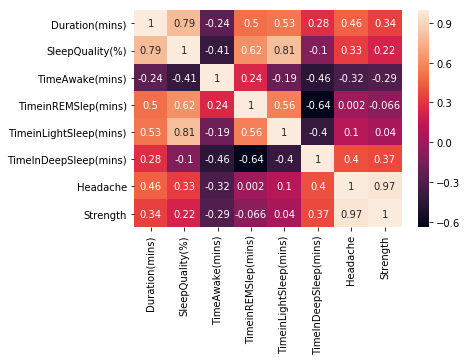

In [191]:
sns.heatmap(df_c2.corr(), annot=True)
plt.show()

#### from the few data available we can see that the strongest correlations with headache are total lenght of sleep and deep sleep; strength of headache is also correlated to total duration and deep sleep, and even stronger with deep sleep